## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/customer_booking(1).csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [9]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [10]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

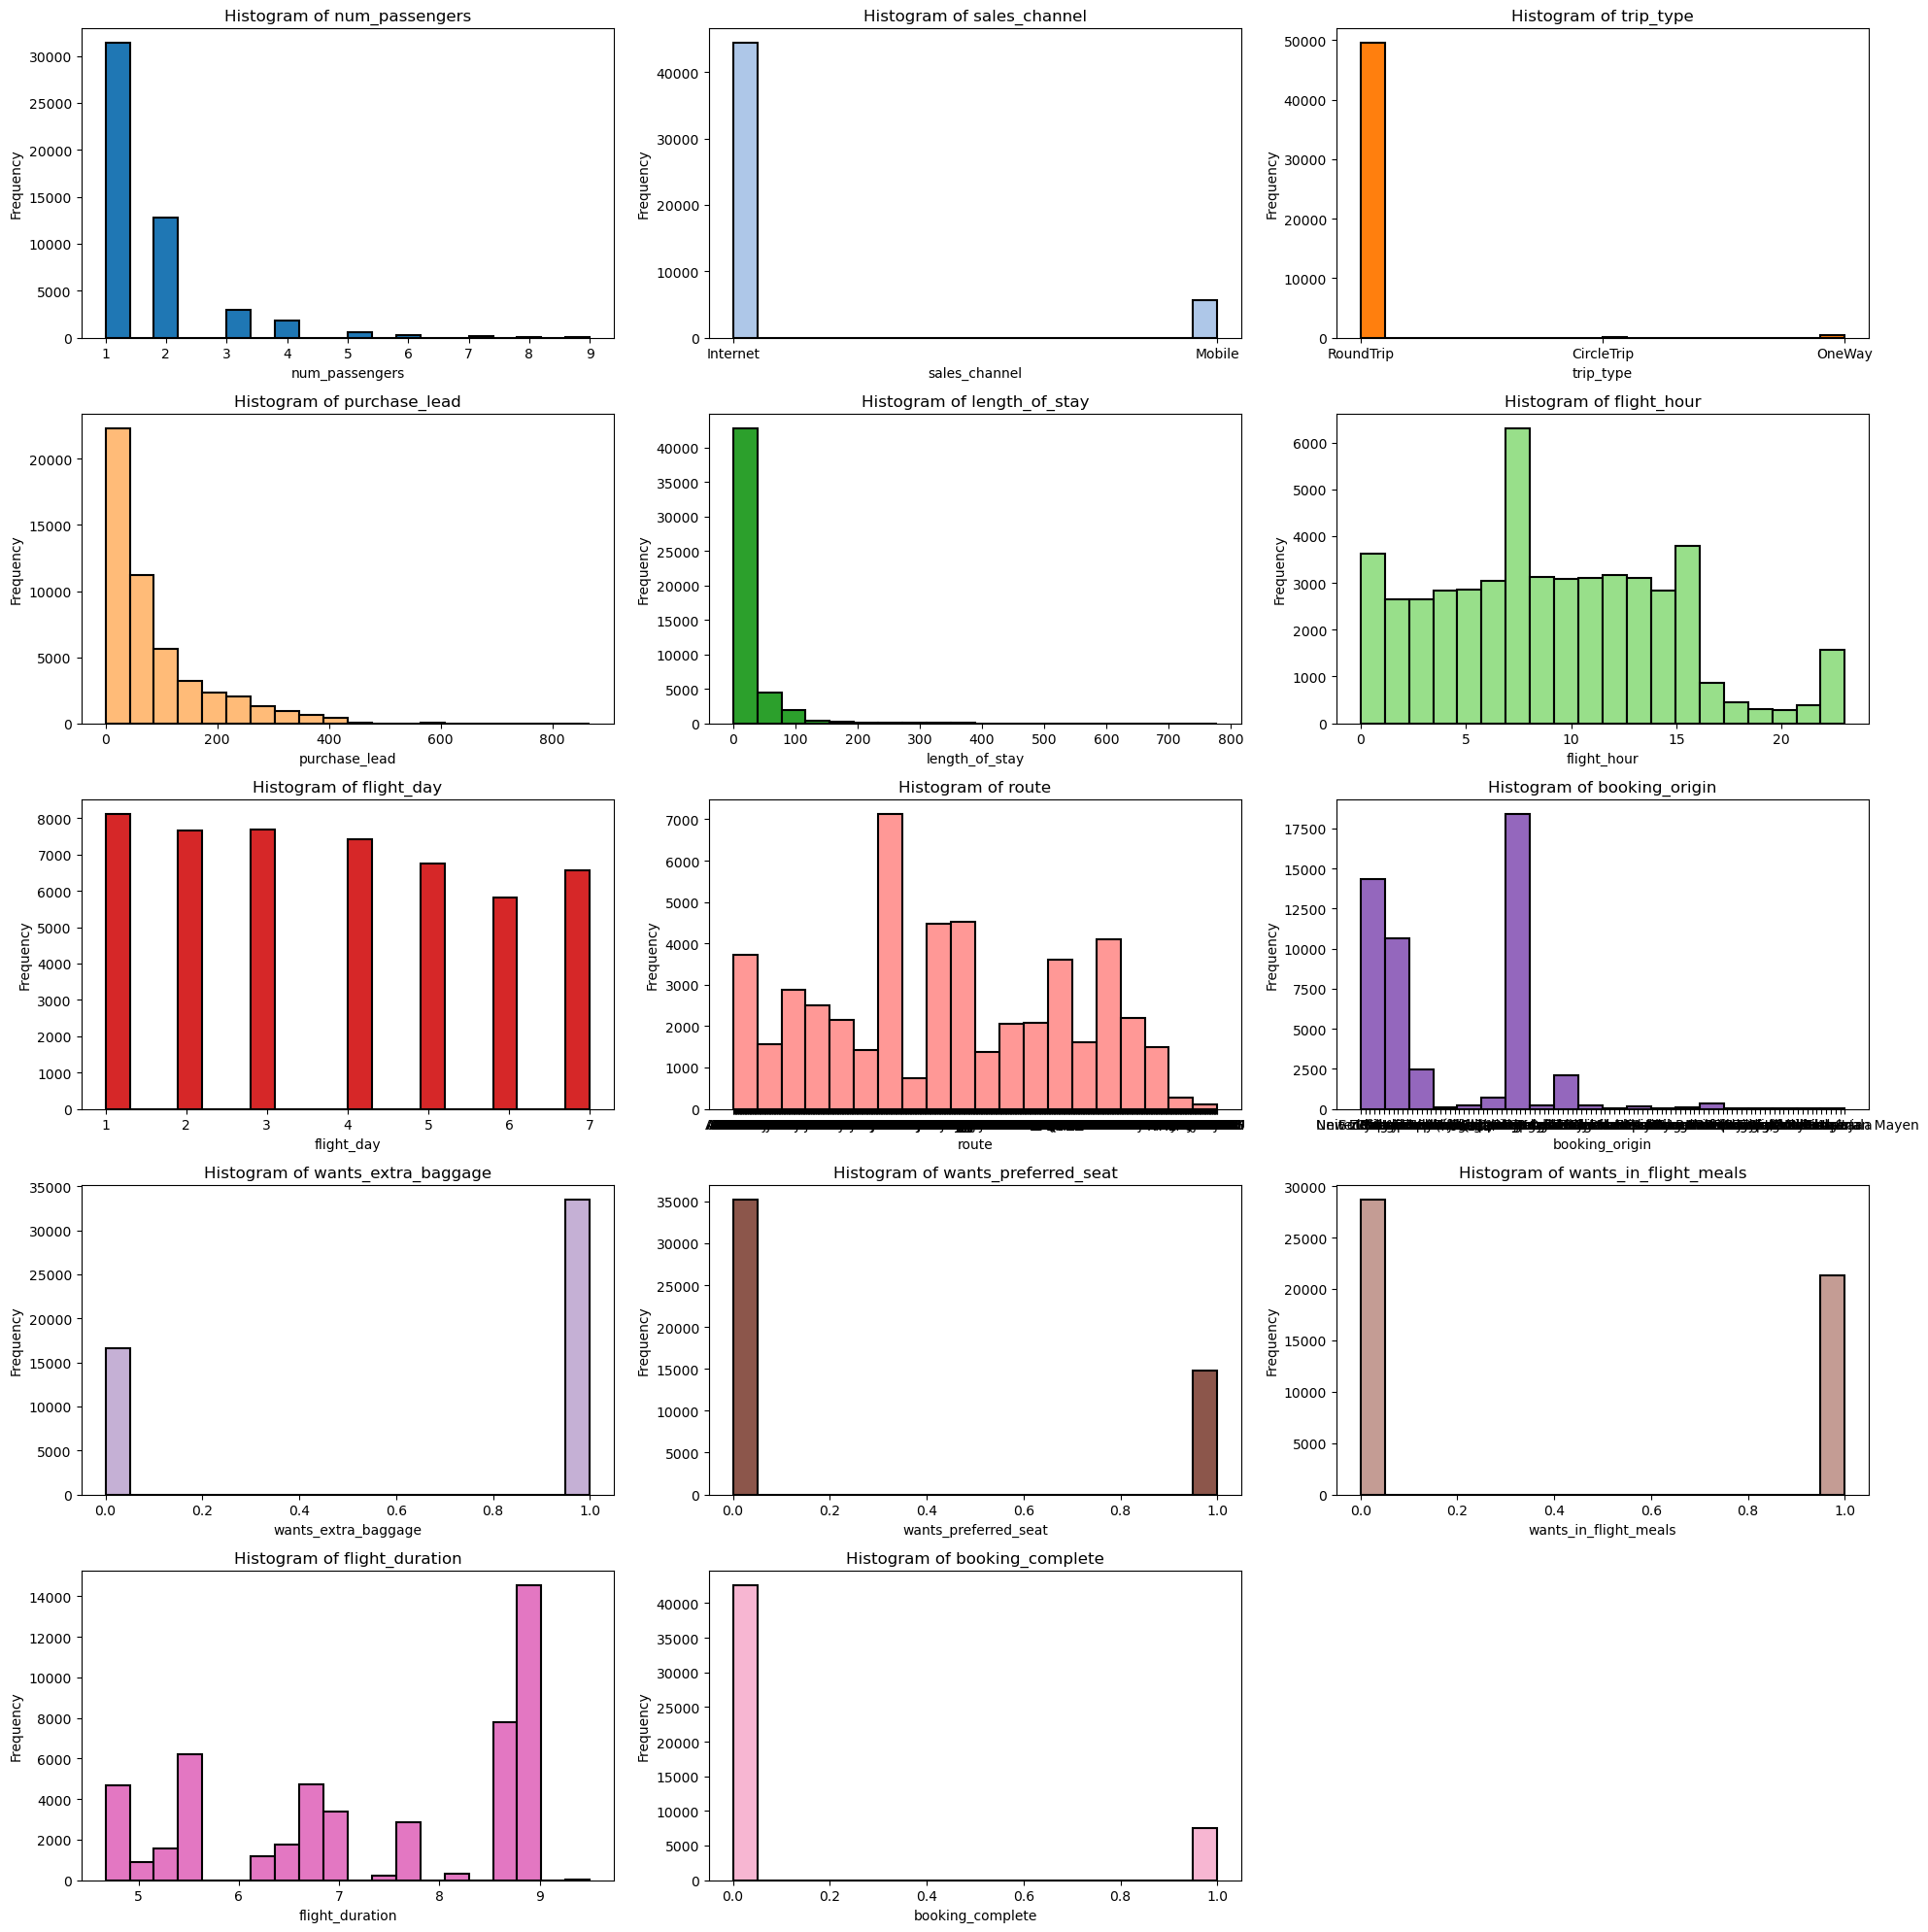

In [11]:
# Columns to visualize
columns = df.columns

# Setting the color for each histogram of the data
colors = plt.cm.tab20.colors
num_colors = len(colors)

# Plotting the histograms
plt.figure(figsize=(20, 20))

# Plot for each column
for i, col in enumerate(columns):
    plt.subplot(5, 3, i + 1)
    plt.hist(df[col], bins=20, color=colors[i % num_colors], edgecolor='black', linewidth=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Checks for missing values in the DataFrame and return the count of missing values in each column
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]


In [14]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

## Encoding categorical data

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),slice(None, -1))],remainder='passthrough')
X=transformer.fit_transform(X)
X

<50000x1760 sparse matrix of type '<class 'numpy.float64'>'
	with 650000 stored elements in Compressed Sparse Row format>

### Data scaling

In [17]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
scaler = StandardScaler(with_mean=False)  # Disable mean subtraction
X = scaler.fit_transform(X)

In [19]:
print(X)

  (0, 1)	2.2911264130667686
  (0, 9)	3.166472366695319
  (0, 13)	10.020665684518272
  (0, 276)	36.77434012867335
  (0, 493)	6.397650662099337
  (0, 826)	4.130565464991775
  (0, 848)	3.120003123894377
  (0, 850)	50.010003001000335
  (0, 1710)	6.897600042167618
  (0, 1754)	2.124712070356259
  (0, 1755)	2.1885728387295456
  (0, 1757)	2.0215785880062582
  (0, 1759)	3.687749319338884
  (1, 0)	2.067860554222685
  (1, 9)	3.166472366695319
  (1, 13)	10.020665684518272
  (1, 126)	21.44103031789888
  (1, 494)	6.319563572662553
  (1, 822)	4.459649026668813
  (1, 848)	3.120003123894377
  (1, 850)	50.010003001000335
  (1, 1710)	6.897600042167618
  (1, 1753)	2.124712070355904
  (1, 1755)	2.1885728387295456
  (1, 1757)	2.0215785880062582
  :	:
  (49998, 9)	3.166472366695319
  (49998, 13)	10.020665684518272
  (49998, 29)	9.596133759877718
  (49998, 490)	2.762140285225048
  (49998, 830)	4.140470487822831
  (49998, 843)	2.713796254313196
  (49998, 1570)	15.07477308335141
  (49998, 1653)	2.08661142453862

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print('Data for training',X_train.shape)
print('Data for testing',X_test.shape)

Data for training (40000, 1760)
Data for testing (10000, 1760)


## Training the Random Regression model on the Training set

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10, random_state=0)

## Predicting the Results using the Random Forest Regressor

In [23]:
y_pred=classifier.predict(X_test)

### Measuring the accuracy of our prediction using the confusion matrix,classification report and accuracy score

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc_score)
print('\n')

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy Score: 0.846


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8487
           1       0.47      0.13      0.21      1513

    accuracy                           0.85     10000
   macro avg       0.67      0.55      0.56     10000
weighted avg       0.80      0.85      0.81     10000



### Visualing the confusion matrix

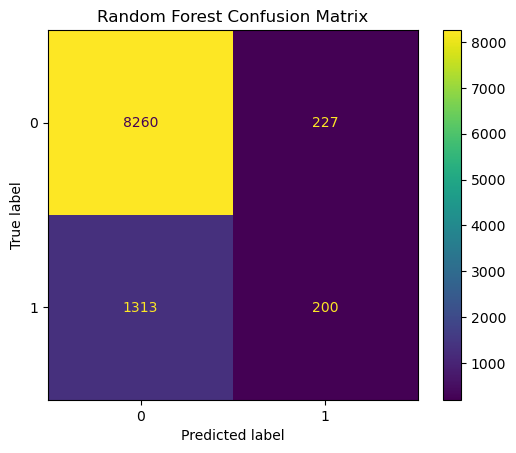

In [25]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

## Feature Importance

                          Feature Importance
booking_origin_Australia            0.041058
flight_duration                     0.039119
booking_origin_Malaysia             0.033059
flight_day_2                        0.010896
length_of_stay_6                    0.010814


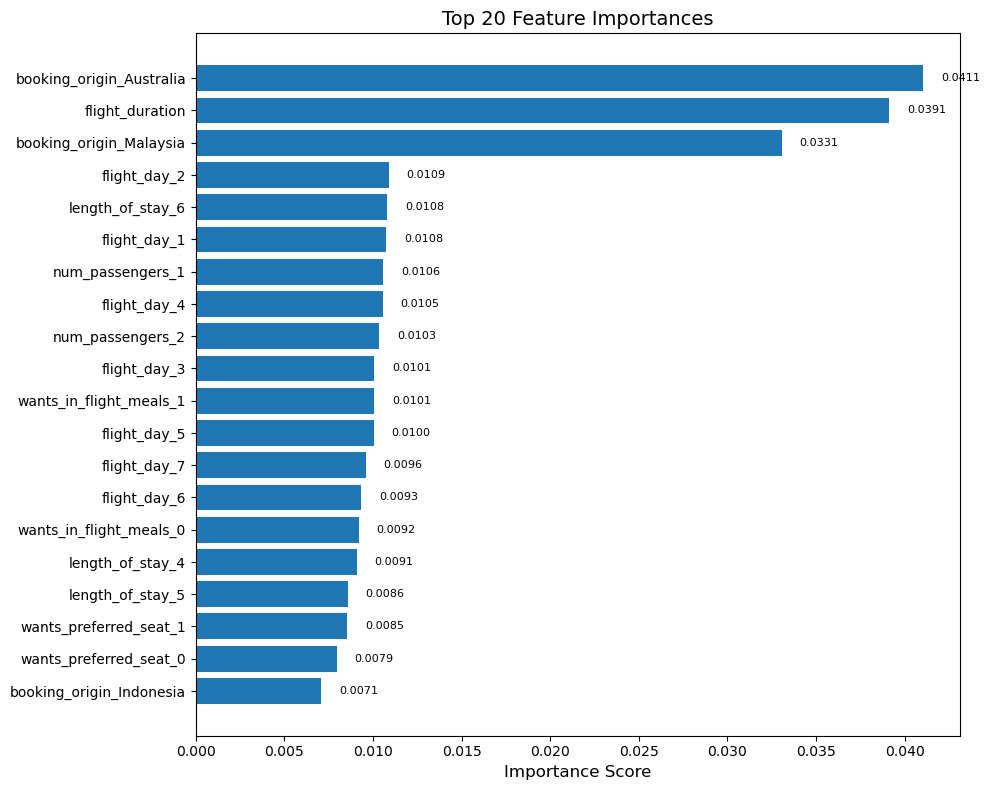

In [35]:
# ----------------------------
# Extract feature names from the transformer
# ----------------------------
# Get the original column names from X (before transformation)
original_columns = df.iloc[:, 0:-1].columns  # df columns used to create X

# Since the transformer applies OneHotEncoder to all columns except the last,
# determine which columns were encoded and which were passed through:
encoded_columns = original_columns[:-1].tolist()  # all except last column
non_encoded_columns = [original_columns[-1]]       # last column passed through

# Retrieve the feature names for the encoded columns using OneHotEncoder's get_feature_names_out method
ohe = transformer.named_transformers_['encoder']
encoded_feature_names = ohe.get_feature_names_out(encoded_columns)

# Combine the encoded feature names with the non-encoded ones
feature_names = np.concatenate([encoded_feature_names, non_encoded_columns])

# ----------------------------
# Create DataFrame for feature importances
# ----------------------------
feature_importance_df = pd.DataFrame({
    'Feature Importance': classifier.feature_importances_
}, index=feature_names)

# Sort the DataFrame for better visualization
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False)

# Print the top features
print(feature_importance_df.head())

# ----------------------------
# Get top 20 features
# ----------------------------
top_20_df = feature_importance_df.head(20)

# ----------------------------
# Visualize the top 20 feature importances
# ----------------------------
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_df.index, top_20_df['Feature Importance'], color='#1f77b4')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Feature Importances', fontsize=14)
plt.gca().invert_yaxis()  # Highest importance at the top

# Customize y-axis labels
plt.yticks(
    ticks=range(len(top_20_df.index)),
    labels=top_20_df.index,
    fontsize=10,
    rotation=0  # Horizontal labels for better readability
)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.001,  # Small offset from bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.4f}',
        va='center',
        ha='left',
        fontsize=8
    )

plt.tight_layout()
plt.show()